# Bootstrapped Line Fitting

In this notebook, you will use bootstrapping to estimate the uncertainty in the slope and intercept of a line fit to data.

## Imports

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## Generative Model

We start with a generative model:

$$
x \sim U(10,20)
$$

$$
y \sim w x + b + N(0,\sigma^2)
$$

Here are the input parameters we are going to use for this model.

In [2]:
w = 0.75
b = 3.5
sigma = 0.5
n = 50

Generate two NumPy arrays of 50 points for this model. Store these values in the arrays `x` and `y`:

In [3]:
x = np.random.uniform(high=20, low=10, size=n)
y = w * x + b + np.random.normal(loc=0, scale=sigma**2, size=n)

Make an appropriately labeled scatter plot of the `x` and `y` data. You should see fluctuations around a straight line. If you don't, you forgot to pass the `size` argument to `np.random.normal` when generating your data above.

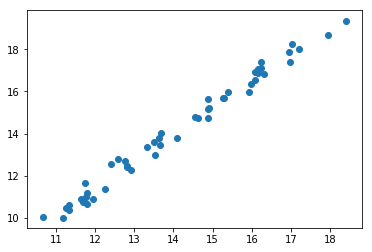

In [4]:
plt.scatter(y, x);

## Fitting the model

In [5]:
from scipy.optimize import minimize

Write a function that computes the MSE for the model $y_{model}(x) = w x + b$:

In [6]:
def mse(theta, x, y):
    """Compute the mean squared error (MSE) for our model.
    
    Parameters
    ----------
    theta: array, list, tuple
        The array of model parameters [w, b].
    x: np.array
        The observed x data.
    y: np.array
        The observed y data.

    """
    model = lambda xdata, w, b: w * xdata + b
    return np.sum((y - model(x, theta[0], theta[1]))**2) / (len(x) - len(theta))

Write a function that uses `scipy.optimize.minimize` to minimize the above MSE to find the best value of theta.

In [7]:
def fit(x, y):
    """Fit our model to observed data and return the best values of theta = [w, b]."""
    fit = minimize(lambda theta: mse(theta, x, y), [0, 0])
    return fit.x

Here are the estimated model parameters. These should be close to the true values we used to generate the data:

In [8]:
w_hat, b_hat = fit(x,y)
w_hat, b_hat

(0.77081085024673501, 3.2040905059138622)

Compute the residuals and visualize them with an appropriately labeled histogram:

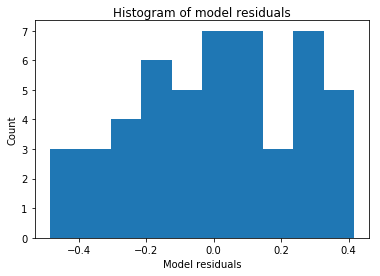

In [9]:
residuals = y - (w_hat * x + b_hat)
plt.hist(residuals)
plt.xlabel('Model residuals')
plt.ylabel('Count')
plt.title('Histogram of model residuals');

Compute the $R^2$ for the model:

In [10]:
benchmark_residuals = y - y.mean()
R2 = 1.0 - residuals.var()/benchmark_residuals.var()
print(R2)

0.986420169689


Plot the model predictions (line), on the same plot as the original data (points). Label the two series of data using a legend.

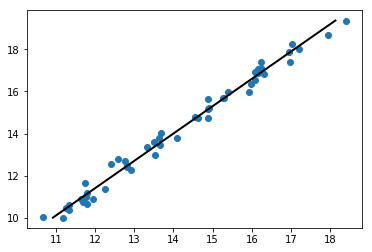

In [11]:
plt.scatter(y, x);
plt.plot([w_hat * x.min() + b_hat, w_hat * x.max() + b_hat], [x.min(), x.max()], color='k', linestyle='-', linewidth=2);

## Bootstrap

Write a function, `bootstrap`, that can create boostrapped versions of the `x` and `x` arrays above. It is important that you bootstrap pairs of `x[i],y[i]` to preserve correlations in the model. Remember, to bootstrap data you will draw random samples with replacement.

In [12]:
def bootstrap(x, y):
    """Return boostrapped versions of the input X and Y arrays, perserving correlations.
    
    Parameters
    ----------
    x: ndarray
        Input x array.
    y: ndarray
        Input y array.
    
    Returns
    -------
    xx: ndarray
        The boostrapped x array with the same shape as x and correlated random samples
        drawn with replacement.
    yy: ndarray
        The bootstrapped y array with the same shape as y and correlated random samples
        drawn with replacement.
    """
    idx = np.random.choice(x.size, size=x.size, replace=True)
    return x[idx], y[idx]

In [13]:
np.random.seed(0)
a = np.array([0,1,2,3])
b = np.array([4,5,6,7])
ab, bb = bootstrap(a, b)
for element in ab:
    assert element in a
for element in bb:
    assert element in b
assert len(a)==len(ab)
assert len(ab)==len(bb)

Write a function, `bootstrap_fit`, that takes finds the slope and intercept of the input `X` and `Y` data  using the `fit` function above. Your function should perform this fit `n` times using bootstrapped data.

In [14]:
def bootstrap_fit(x, y, n):
    """Fit a straight line to x and y n times using bootstrapping.
    
    Returns
    -------
    (w, b): tuple of ndarrays
        A tuple of 1d arrays with the bootstrapped values of the weight and intercept.
    """
    w = np.zeros(n)
    b = np.zeros(n)
    for i in range(n):
        w[i], b[i] = fit(*bootstrap(x, y))
    return w, b

Using the original `x` and `y` data above:

* Find the bootstrapped weights/slopes and intercepts (bootstrap 200 times).
* Make an appropriately labeled 2d histogram of the bootstrapped slopes and intercepts.
* Find and print the 95% confidence intervals for the slope and intercept.

95% confidence interval for w: [ 0.74628327  0.79633474]
95% confidence interval for b: [ 2.84906787  3.58533206]


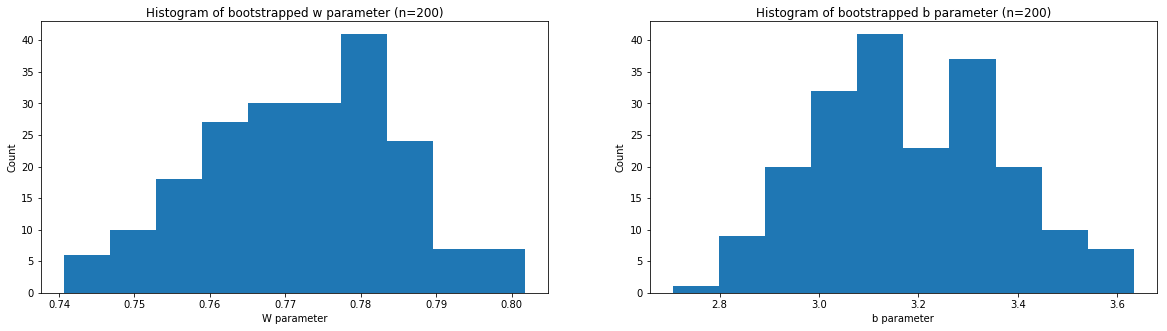

In [15]:
w_boot, b_boot = bootstrap_fit(x, y, 200)

fig, (w_axes, b_axes) = plt.subplots(1, 2, figsize=(20,5))
w_axes.hist(w_boot);
w_axes.set_xlabel('W parameter')
w_axes.set_ylabel('Count')
w_axes.set_title('Histogram of bootstrapped w parameter (n=200)')
w_boot_conf_intv = np.percentile(w_boot, [2.5, 97.5])
print("95% confidence interval for w:", w_boot_conf_intv)

b_axes.hist(b_boot);
b_axes.set_xlabel('b parameter')
b_axes.set_ylabel('Count')
b_axes.set_title('Histogram of bootstrapped b parameter (n=200)')
b_boot_conf_intv = np.percentile(b_boot, [2.5, 97.5])
print("95% confidence interval for b:", b_boot_conf_intv)
